# Stage 02: Exploratory analysis

This file is an exploratory analysis of the Taxis NYC Data in January, 2018. We divide this stage in four steps:

1. Importing libraries.
2. Loading the data.
3. Description and analysis of the Data.
4. Considerations.

### Step 1: Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

### Step 2: Loading the Data


In [2]:
df = pd.read_parquet ('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-01.parquet')

### Paso 3: Description and Analysis
General information

In [11]:
df.info(null_counts=True)

C:\Users\Xavi\AppData\Local\Temp\ipykernel_14868\1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760687 entries, 0 to 8760686
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               8760687 non-null  int64         
 1   tpep_pickup_datetime   8760687 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  8760687 non-null  datetime64[ns]
 3   passenger_count        8760687 non-null  int64         
 4   trip_distance          8760687 non-null  float64       
 5   RatecodeID             8760687 non-null  int64         
 6   store_and_fwd_flag     8760687 non-null  object        
 7   PULocationID           8760687 non-null  int64         
 8   DOLocationID           8760687 non-null  int64         
 9   payment_type           8760687 non-null  int64         
 10  fare_amount            8760687 non-null  float64       
 11  extra                  8760687 non-null  float64       
 12  mta_tax                87606

In [12]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN
5,1,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,1,N,143,143,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
6,1,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,1,N,50,239,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,NaN,NaN
7,1,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,1,N,239,238,1,4.0,0.5,0.5,1.00,0.0,0.3,6.30,NaN,NaN
8,1,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,1,N,238,24,1,5.5,0.5,0.5,1.70,0.0,0.3,8.50,NaN,NaN
9,1,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,1,N,170,170,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,NaN,NaN


Missing values

In [13]:
# This method is for plotting percentage values over barplots

def without_hue(ax, feature,centering):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - centering
        y = 5
        ax.annotate(percentage, (x, y), size = 12)

In [14]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

congestion_surcharge    8760675
airport_fee             8760675
dtype: int64

In [15]:
df[~df.congestion_surcharge.isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2757790,1,2018-01-11 22:26:54,2018-01-11 22:47:58,1,2.1,1,Y,141,238,1,14.5,2.5,0.5,2.56,0.0,0.3,20.36,2.5,0.0
2775061,1,2018-01-11 23:56:19,2018-01-12 00:03:56,1,1.0,1,Y,186,234,1,7.0,2.5,0.5,2.05,0.0,0.3,12.35,2.5,0.0
2788636,1,2018-01-12 00:47:17,2018-01-12 00:55:40,1,1.8,1,Y,239,43,1,8.5,2.5,0.5,2.35,0.0,0.3,14.15,2.5,0.0
2797515,1,2018-01-12 01:06:08,2018-01-12 01:08:21,1,0.4,1,Y,237,237,1,3.5,2.5,0.5,1.70,0.0,0.3,8.50,2.5,0.0
2797516,1,2018-01-12 01:36:42,2018-01-12 01:59:20,1,4.4,1,Y,249,263,1,17.5,2.5,0.5,4.15,0.0,0.3,24.95,2.5,0.0
2802926,1,2018-01-12 02:12:13,2018-01-12 02:32:56,1,3.0,1,Y,236,107,1,15.0,2.5,0.5,0.00,0.0,0.3,18.30,2.5,0.0
2806273,1,2018-01-12 03:04:33,2018-01-12 03:20:42,1,1.6,1,Y,90,170,1,11.5,2.5,0.5,2.95,0.0,0.3,17.75,2.5,0.0
2806274,1,2018-01-12 03:43:43,2018-01-12 03:52:47,1,1.4,1,Y,236,239,1,8.0,2.5,0.5,2.80,0.0,0.3,14.10,2.5,0.0
2808670,1,2018-01-12 04:02:35,2018-01-12 04:08:34,1,0.7,1,Y,48,230,1,6.0,2.5,0.5,2.75,0.0,0.3,12.05,2.5,0.0
2808671,1,2018-01-12 04:27:46,2018-01-12 04:34:35,1,1.1,1,Y,68,158,1,6.5,2.5,0.5,0.80,0.0,0.3,10.60,2.5,0.0


In [16]:
missing_values = missing_values.to_frame()
missing_values.columns = ['Quantity']
missing_values.index.names = ['Field']
missing_values['Field'] = missing_values.index

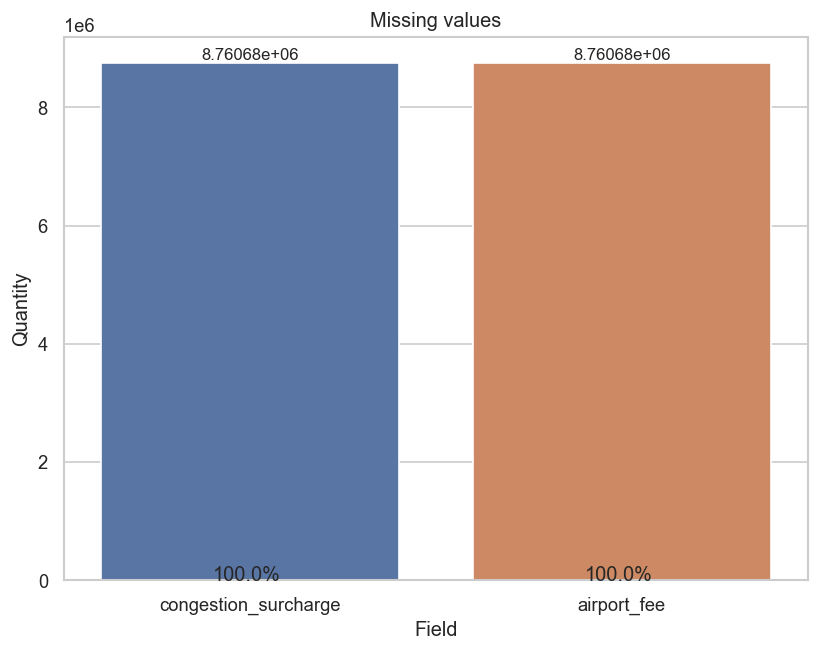

In [17]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = 'Field', y = 'Quantity', data=missing_values)
plt.bar_label(splot.containers[0])
without_hue (splot,df,0.1)
plt.title('Missing values')
plt.show()

Duplicate values

In [18]:
df.duplicated().sum()

1

In [19]:
df[df.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3861553,2,2018-01-15 16:15:02,2018-01-15 16:15:04,5,0.06,1,N,264,138,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,NaN


In [20]:
df[(df.tpep_pickup_datetime == '2018-01-15 16:15:02') & (df.tpep_dropoff_datetime == '2018-01-15 16:15:04')]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3861550,2,2018-01-15 16:15:02,2018-01-15 16:15:04,5,0.06,1,N,264,138,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,NaN
3861553,2,2018-01-15 16:15:02,2018-01-15 16:15:04,5,0.06,1,N,264,138,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,NaN


a) VendorID

In [21]:
df.VendorID.unique()

array([1, 2], dtype=int64)

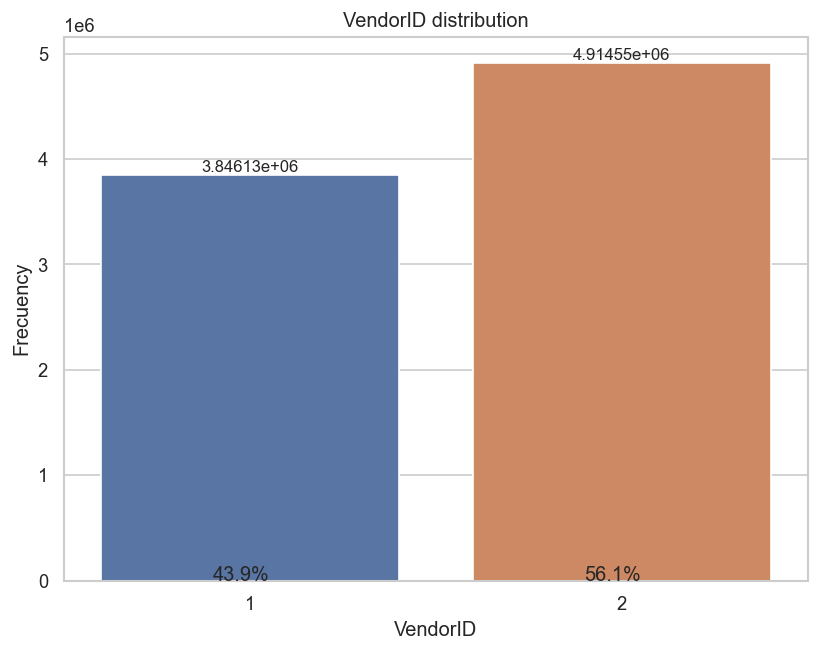

In [22]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'VendorID',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuency')
without_hue (splot,df,0.1)
plt.title('VendorID distribution')
plt.show()

b) passenger_count

In [23]:
df.passenger_count.unique()

array([1, 2, 3, 5, 4, 6, 0, 7, 8, 9], dtype=int64)

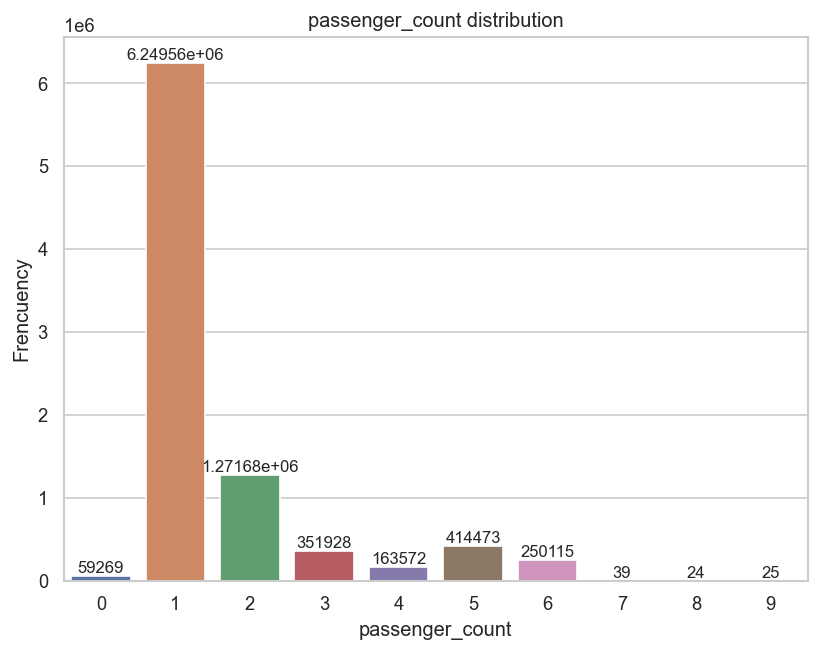

In [24]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'passenger_count',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frencuency')
plt.title('passenger_count distribution')
plt.show()

The yellow taxis laws said that the maximum passengers in the vehicle is 4 or 5, depend on the vehicle. There are more than 250 thousands fields with 6 or more passengers.

c) trip_distance

In [25]:
df.trip_distance.describe()

count    8.760687e+06
mean     2.804022e+00
std      6.412050e+01
min      0.000000e+00
25%      9.100000e-01
50%      1.550000e+00
75%      2.840000e+00
max      1.894838e+05
Name: trip_distance, dtype: float64

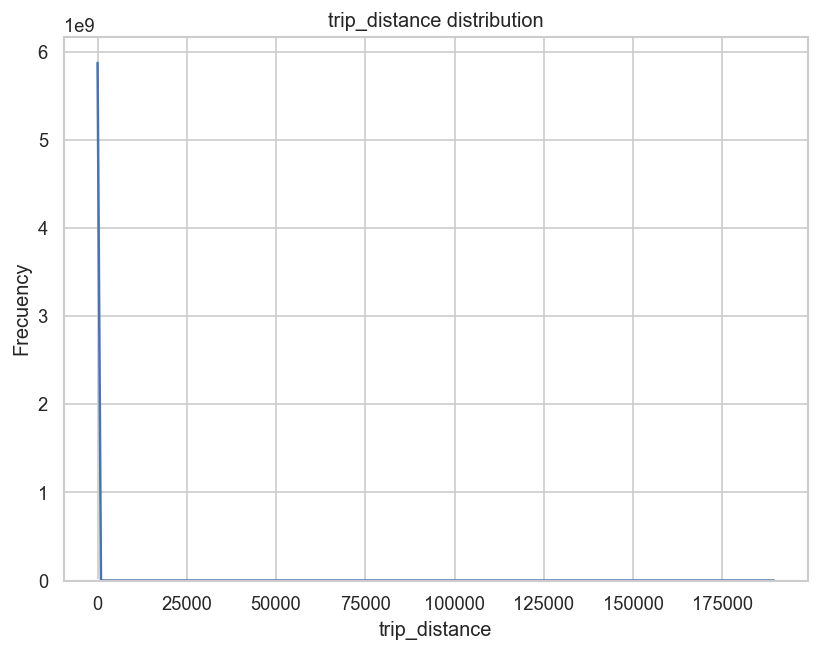

In [26]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'trip_distance',data=df,bins=30,kde=True)
plt.ylabel('Frecuency')
plt.title('trip_distance distribution')
plt.show()

When observing the distribution of the data, the presence of outliers was detected. Thus, we proceeded to indetify them, based on the interquartile range.

In [27]:
IQR = df.trip_distance.quantile(.75) - df.trip_distance.quantile(.25)
min = df.trip_distance.quantile(.25) - (1.5 * IQR)
max = df.trip_distance.quantile(.75) + (1.5 * IQR)

In [28]:
df.trip_distance[df.trip_distance < min].count()

0

In [29]:
df.trip_distance[df.trip_distance > max].count()

970323

In [30]:
df.trip_distance[df.trip_distance < max].describe()

count    7.790364e+06
mean     1.715536e+00
std      1.164348e+00
min      0.000000e+00
25%      8.800000e-01
50%      1.400000e+00
75%      2.240000e+00
max      5.730000e+00
Name: trip_distance, dtype: float64

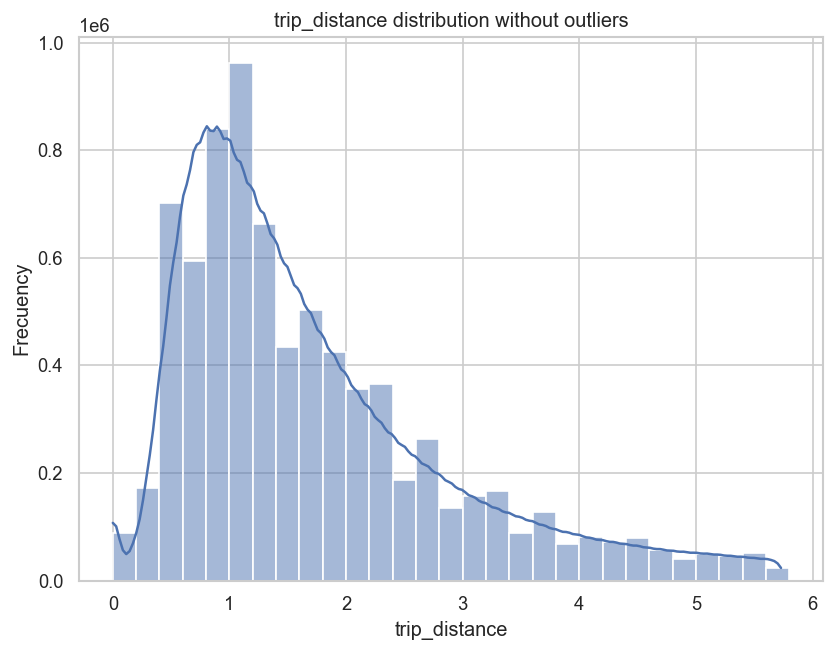

In [31]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'trip_distance',data=df[df.trip_distance <= max],binwidth=0.2,kde=True)
plt.ylabel('Frecuency')
plt.title('trip_distance distribution without outliers')
plt.show()

In [32]:
df[df.trip_distance > 25].count()

VendorID                 9635
tpep_pickup_datetime     9635
tpep_dropoff_datetime    9635
passenger_count          9635
trip_distance            9635
RatecodeID               9635
store_and_fwd_flag       9635
PULocationID             9635
DOLocationID             9635
payment_type             9635
fare_amount              9635
extra                    9635
mta_tax                  9635
tip_amount               9635
tolls_amount             9635
improvement_surcharge    9635
total_amount             9635
congestion_surcharge        0
airport_fee                 0
dtype: int64

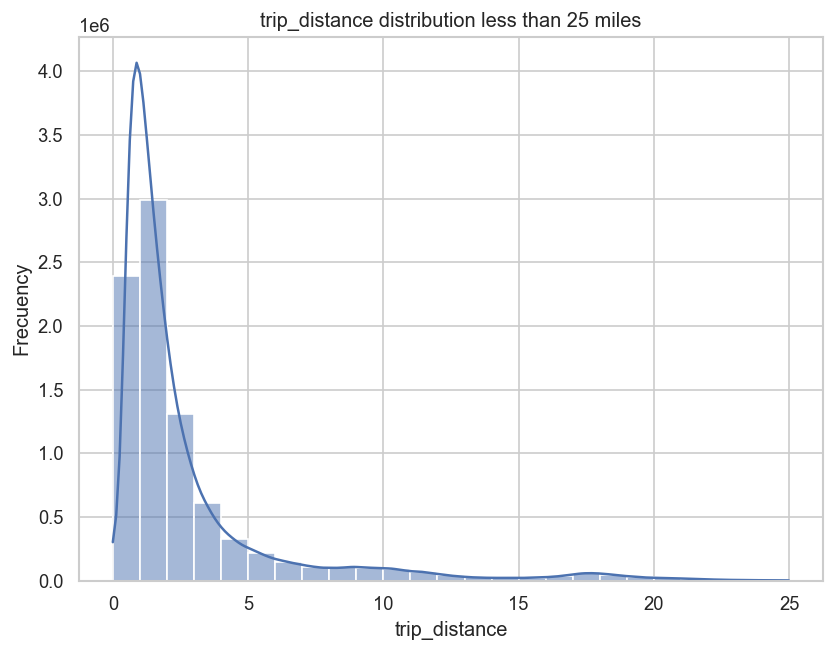

In [33]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'trip_distance',data=df[df.trip_distance < 25],binwidth=1,kde=True)
plt.ylabel('Frecuency')
plt.title('trip_distance distribution less than 25 miles')
plt.show()

In [34]:
df[df.trip_distance > 400]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1858262,1,2018-01-08 19:44:54,2018-01-08 19:50:00,0,830.80,1,N,100,230,1,5.5,1.0,0.5,1.8,0.00,0.3,9.10,NaN,NaN
2994332,2,2018-01-12 17:36:09,2018-01-13 04:50:42,1,484.91,4,N,132,265,2,2409.0,1.0,0.5,0.0,7.01,0.3,2417.81,NaN,NaN
8237763,2,2018-01-30 11:41:02,2018-01-30 11:42:09,1,189483.84,1,N,193,193,2,4.0,0.0,0.0,0.0,0.00,0.0,4.00,NaN,NaN


A trip with 189483.84 miles of distance and 1 minute and 7 seconds is impossible. The same with the 830 miles trip. 

In [35]:
dic_quality =  {'Outliers': df.trip_distance[df.trip_distance > max].count(),
                'Not outliers': df.trip_distance.count() - df.trip_distance[df.trip_distance > max].count()}
df_quality = pd.DataFrame(list(dic_quality.items()),columns = ['State', 'Quantity'])

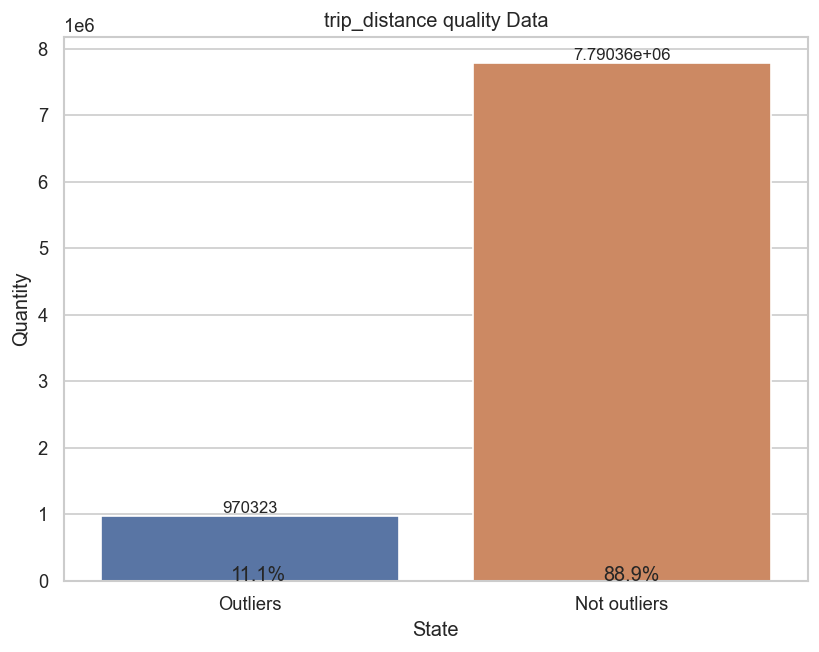

In [36]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_quality['State'],y = 'Quantity', data = df_quality)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('trip_distance quality Data')
plt.show()

In [37]:
df[df.trip_distance < df.trip_distance.quantile(.99)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,NaN,NaN
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,NaN,NaN
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,NaN
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN


d) RateCodeID

In [38]:
df.RatecodeID.unique()

array([ 1,  2,  5,  4,  3,  6, 99], dtype=int64)

In [39]:
df[df.RatecodeID == 99]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
63490,1,2018-01-01 03:38:10,2018-01-01 03:38:10,0,0.0,99,N,264,264,1,28.00,0.0,0.5,0.00,0.0,0.3,28.80,NaN,NaN
133406,1,2018-01-01 13:39:03,2018-01-01 13:39:03,0,0.0,99,N,264,264,1,85.00,0.0,0.0,0.00,0.0,0.0,85.00,NaN,NaN
263621,1,2018-01-02 07:44:13,2018-01-02 07:44:13,0,0.0,99,N,264,264,3,12.35,0.0,0.0,0.00,0.0,0.0,12.35,NaN,NaN
263622,1,2018-01-02 07:45:52,2018-01-02 07:45:52,0,0.0,99,N,264,264,3,12.35,0.0,0.0,0.00,0.0,0.0,12.35,NaN,NaN
263623,1,2018-01-02 07:47:19,2018-01-02 07:47:19,0,0.0,99,N,264,264,1,12.35,0.0,0.0,0.00,0.0,0.0,12.35,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516724,1,2018-01-31 09:15:45,2018-01-31 09:15:45,0,0.0,99,N,264,264,1,5.00,0.5,0.0,0.00,0.0,0.3,5.80,NaN,NaN
8562741,1,2018-01-31 12:12:42,2018-01-31 12:12:42,0,0.0,99,Y,79,264,3,11.31,0.0,0.0,0.00,0.0,0.0,11.31,NaN,NaN
8562742,1,2018-01-31 12:53:23,2018-01-31 12:53:23,0,0.0,99,Y,234,264,3,17.80,0.0,0.0,0.00,0.0,0.0,17.80,NaN,NaN
8565401,1,2018-01-31 13:59:15,2018-01-31 13:59:15,0,0.0,99,N,264,264,1,31.00,0.3,0.5,0.00,0.0,0.0,31.80,NaN,NaN


106 fields with a value equal to 99 were founded. This number (99) are not defined in the data dictionary.

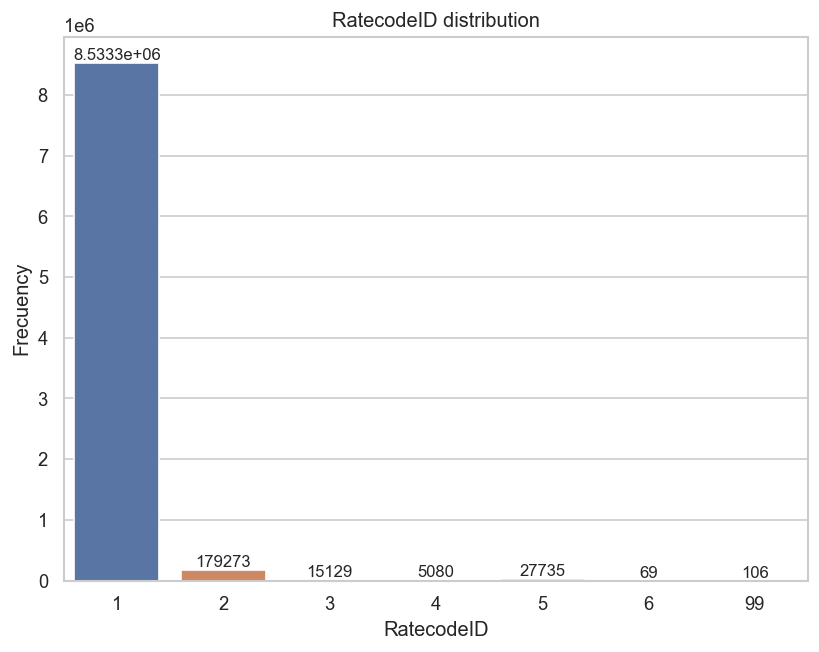

In [40]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'RatecodeID',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuency')
plt.title('RatecodeID distribution')
plt.show()

e) store_and_fwd_flag

In [41]:
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

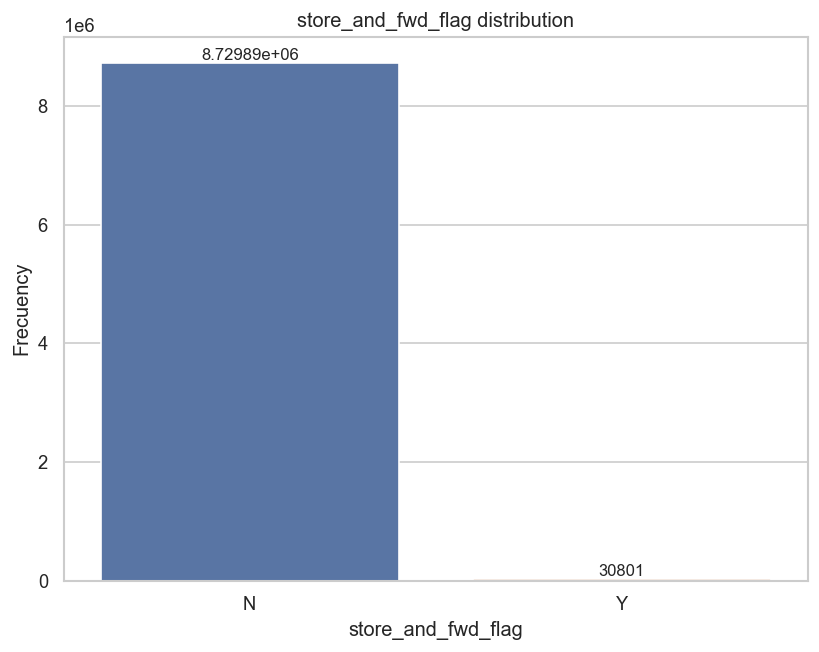

In [42]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'store_and_fwd_flag',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuency')
plt.title('store_and_fwd_flag distribution')
plt.show()

f) PULocationID

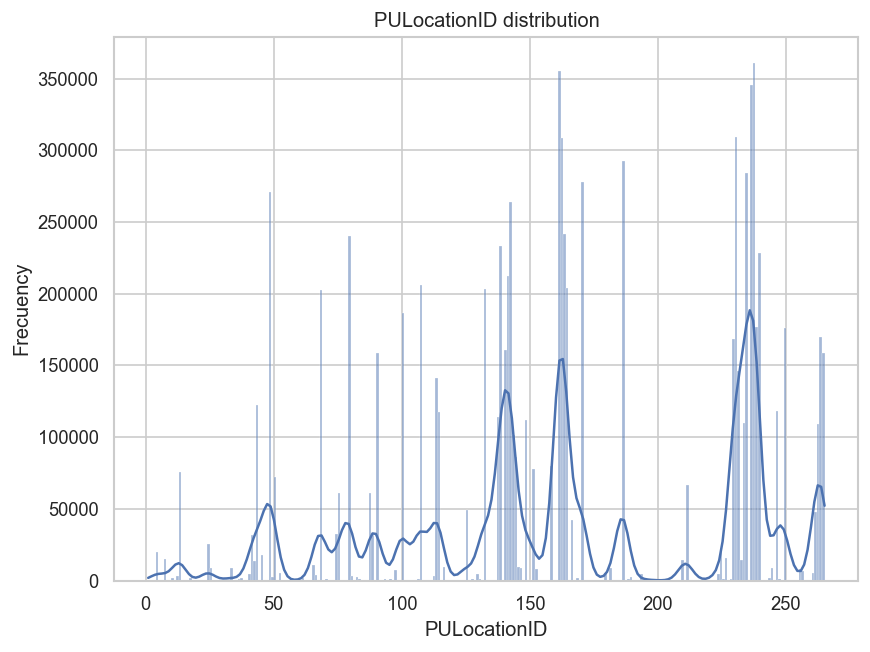

In [43]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'PULocationID',data=df,binwidth=1,kde=True)
plt.ylabel('Frecuency')
plt.title('PULocationID distribution')
plt.show()

g) Campo DOLocationID

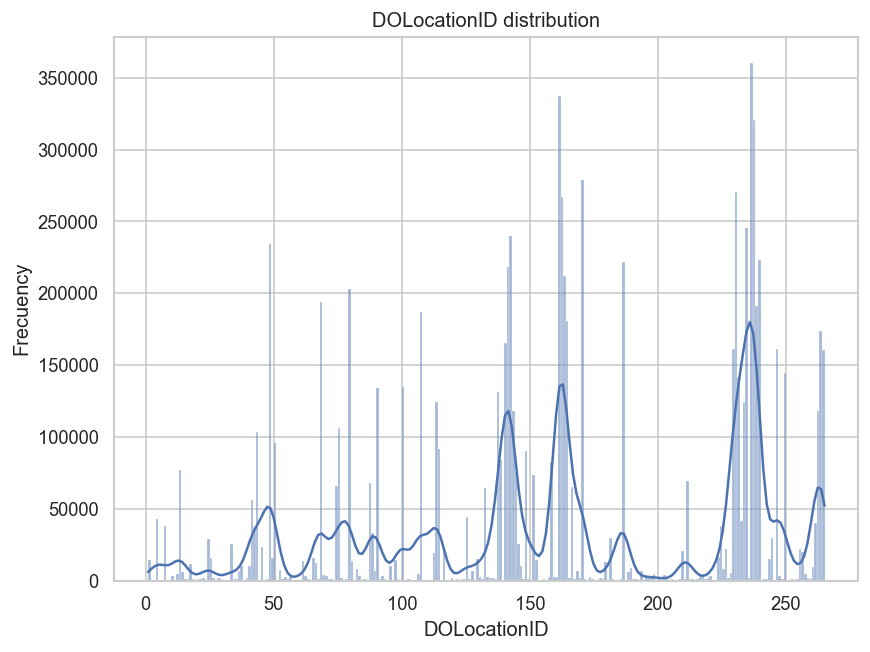

In [44]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'DOLocationID',data=df,binwidth=1,kde=True)
plt.ylabel('Frecuency')
plt.title('DOLocationID distribution')
plt.show()

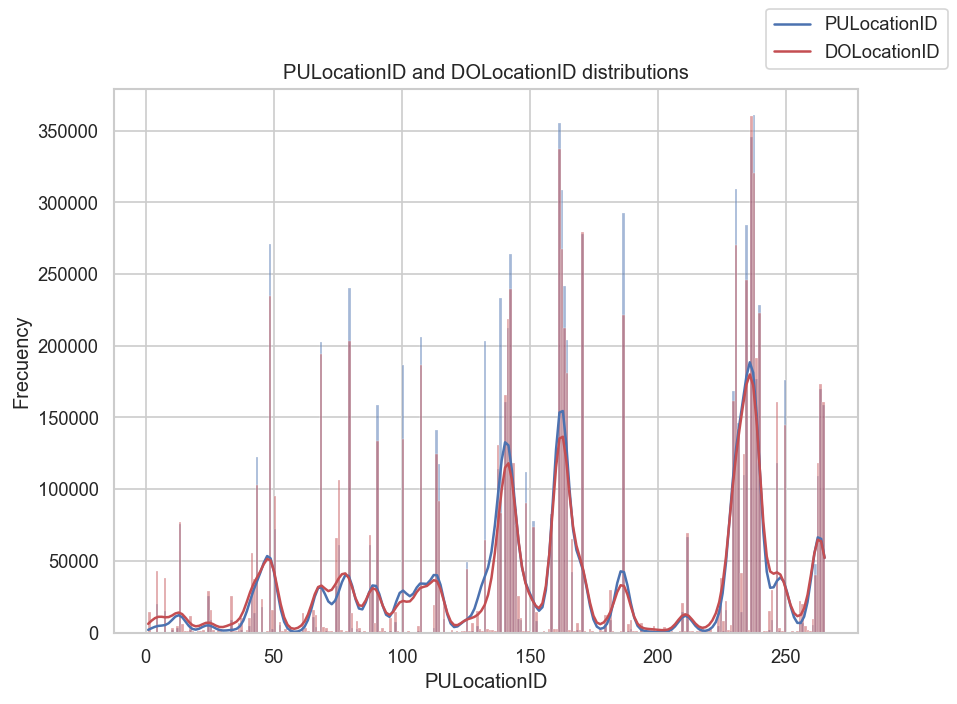

In [45]:
fig = plt.figure(figsize=(8, 6), dpi=120)
splot1 = sns.histplot(x = 'PULocationID',data=df,color='b',binwidth=1,kde=True)
splot2 = sns.histplot(x = 'DOLocationID',data=df,color='r',binwidth=1,kde=True)
plt.ylabel('Frecuency')
fig.legend(labels=['PULocationID','DOLocationID'])
plt.title('PULocationID and DOLocationID distributions')
plt.show()

h) payment_type

In [46]:
df.payment_type.unique()

array([2, 1, 4, 3], dtype=int64)

No hay registros con valores 5 o 6

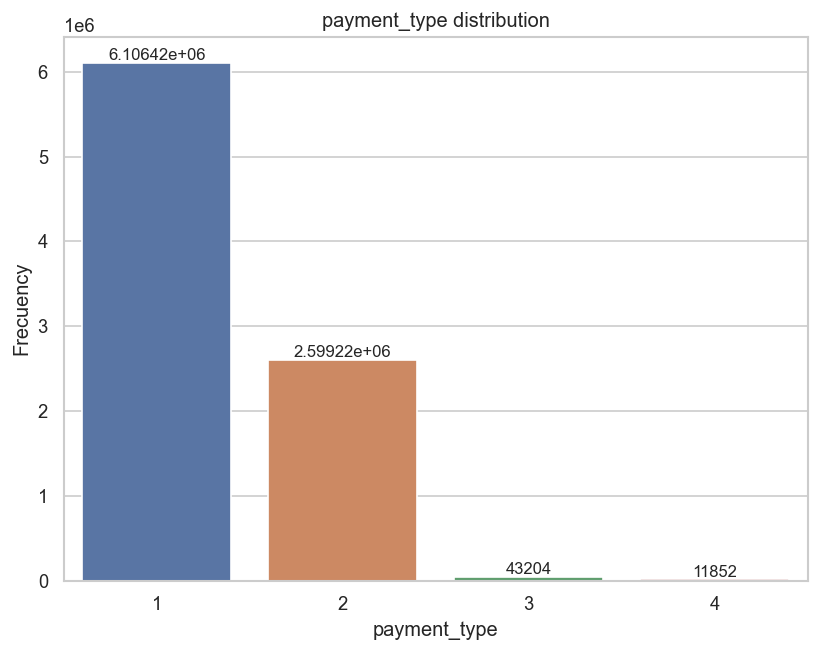

In [47]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'payment_type',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuency')
plt.title('payment_type distribution')
plt.show()

i) fare_amount

In [48]:
df.fare_amount.describe()

count    8.760687e+06
mean     1.224443e+01
std      1.168321e+01
min     -4.500000e+02
25%      6.000000e+00
50%      9.000000e+00
75%      1.350000e+01
max      8.016000e+03
Name: fare_amount, dtype: float64

In [49]:
df[df.fare_amount < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
58,2,2018-01-01 01:02:39,2018-01-01 01:04:02,2,0.09,1,N,87,87,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN
840,2,2018-01-01 00:38:19,2018-01-01 00:55:57,1,0.41,1,N,68,68,4,-11.0,-0.5,-0.5,0.0,0.0,-0.3,-12.3,NaN,NaN
3862,2,2018-01-01 00:46:31,2018-01-01 00:46:34,1,0.00,5,N,264,238,4,-13.8,0.0,0.0,0.0,0.0,-0.3,-14.1,NaN,NaN
4084,2,2018-01-01 00:47:40,2018-01-01 00:49:06,1,0.13,1,N,137,137,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN
4242,2,2018-01-01 00:11:10,2018-01-01 00:15:14,1,0.16,1,N,137,170,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754678,2,2018-01-31 23:21:05,2018-01-31 23:24:44,1,0.69,1,N,164,234,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN
8754757,2,2018-01-31 23:26:11,2018-01-31 23:26:46,2,0.03,1,N,68,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN
8755958,2,2018-01-31 23:21:56,2018-01-31 23:21:59,1,0.00,1,N,264,112,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN
8756003,2,2018-01-31 23:56:06,2018-01-31 23:57:06,2,0.12,1,N,246,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN


We found 4260 fields with negative values

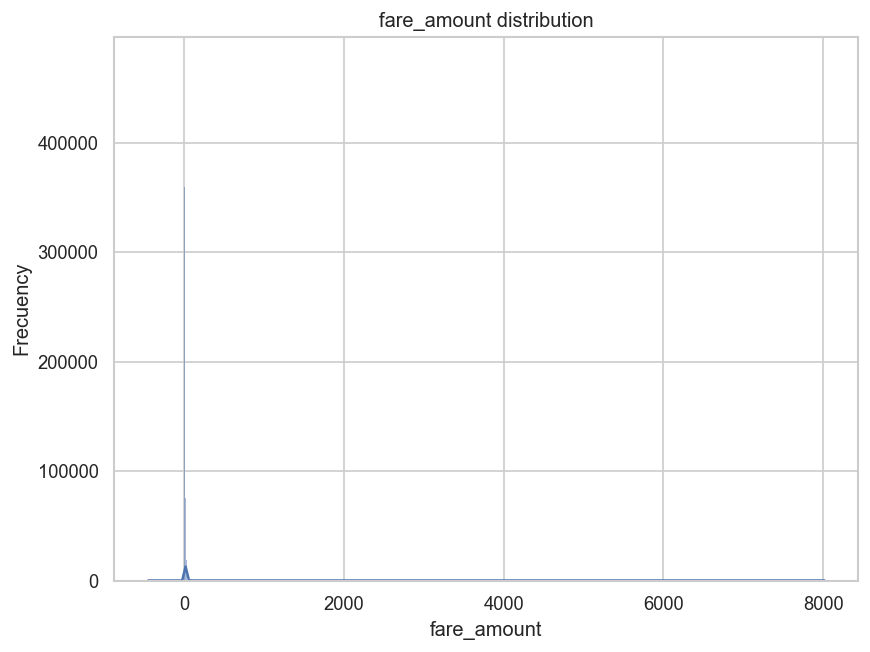

In [50]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_amount', data=df, binwidth=0.1, kde=True)
plt.ylabel('Frecuency')
plt.title('fare_amount distribution')
plt.show()

There are outliers. Again, we proceeded to identify them based on interqualtile range.

In [51]:
IQR = df.fare_amount.quantile(.75) - df.fare_amount.quantile(.25)
min = df.fare_amount.quantile(.25) - (1.5 * IQR)
max = df.fare_amount.quantile(.75) + (1.5 * IQR)

In [52]:
df.fare_amount[df.fare_amount < min].count()

938

In [53]:
df.fare_amount[df.fare_amount > max].count()

788816

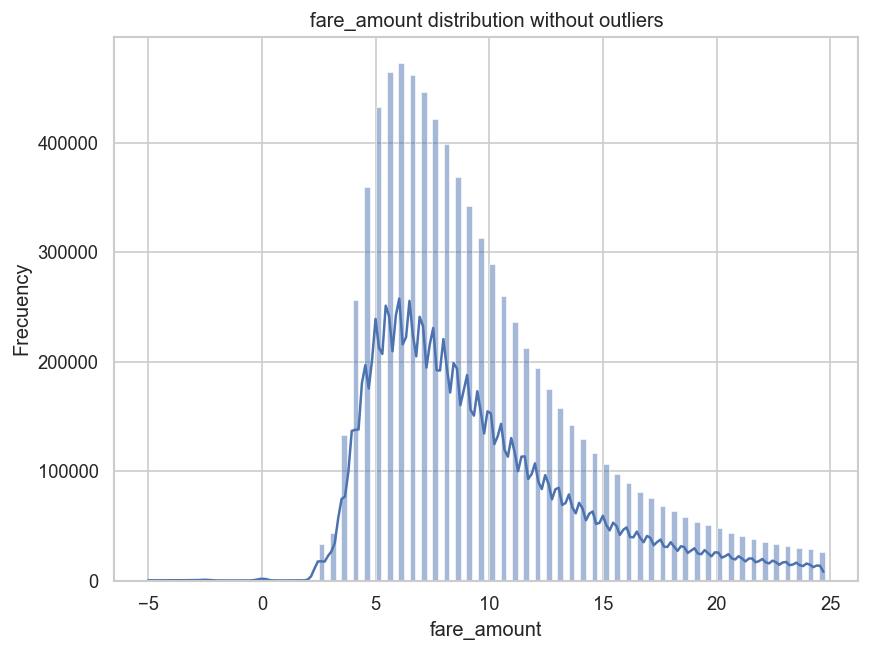

In [54]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_amount',data=df[(df.fare_amount >= min) & (df.fare_amount <= max)],binwidth=0.25,kde=True)
plt.ylabel('Frecuency')
plt.title('fare_amount distribution without outliers')
plt.show()

In [55]:
dic_calidad =  {'Outliers': df.fare_amount[df.fare_amount < min].count() + df.fare_amount[df.fare_amount > max].count(),
                'Sin errores': df.fare_amount.count() - (df.fare_amount[df.fare_amount < min].count() + df.fare_amount[df.fare_amount > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])

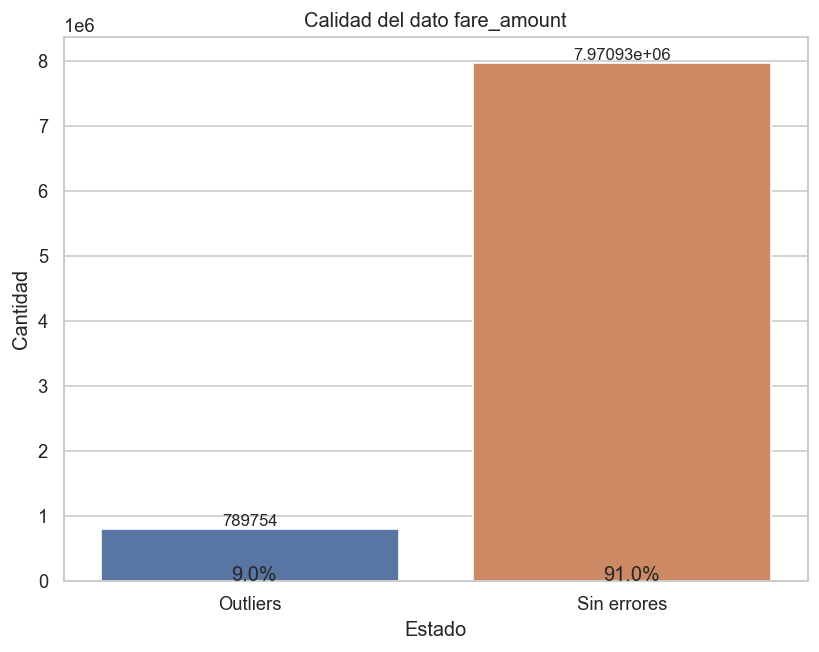

In [56]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato fare_amount')
plt.show()

j) Campo extra

In [57]:
df.extra.nunique()

42

In [58]:
df.extra.describe()

count    8.760687e+06
mean     3.246882e-01
std      4.502555e-01
min     -4.469000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e-01
max      6.000000e+01
Name: extra, dtype: float64

Nuevamente, hay valores negativos

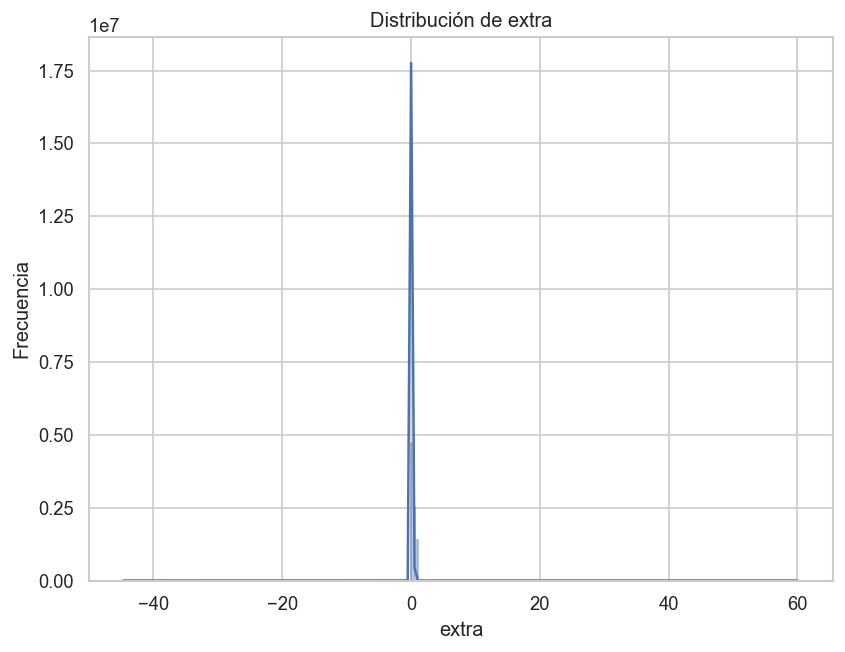

In [59]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'extra',data=df,binwidth=0.5,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de extra')
plt.show()

In [60]:
IQR = df.extra.quantile(.75) - df.extra.quantile(.25)
min = df.extra.quantile(.25) - (1.5 * IQR)
max = df.extra.quantile(.75) + (1.5 * IQR)

In [61]:
df.extra[df.extra < min].count()

618

In [62]:
df.extra[df.extra > max].count()

30744

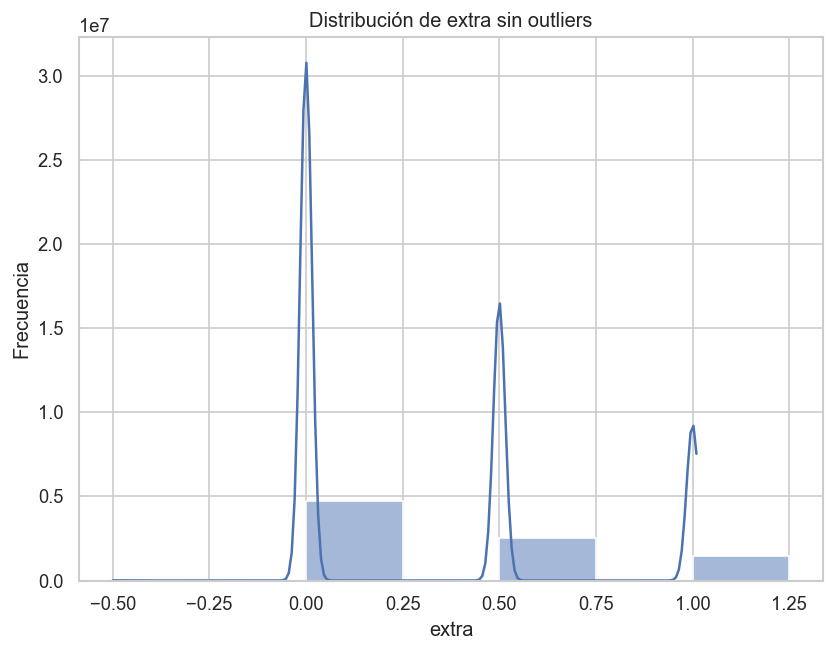

In [63]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'extra', data=df[(df.extra > min) & (df.extra < max)], binwidth=0.25, kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de extra sin outliers')
plt.show()

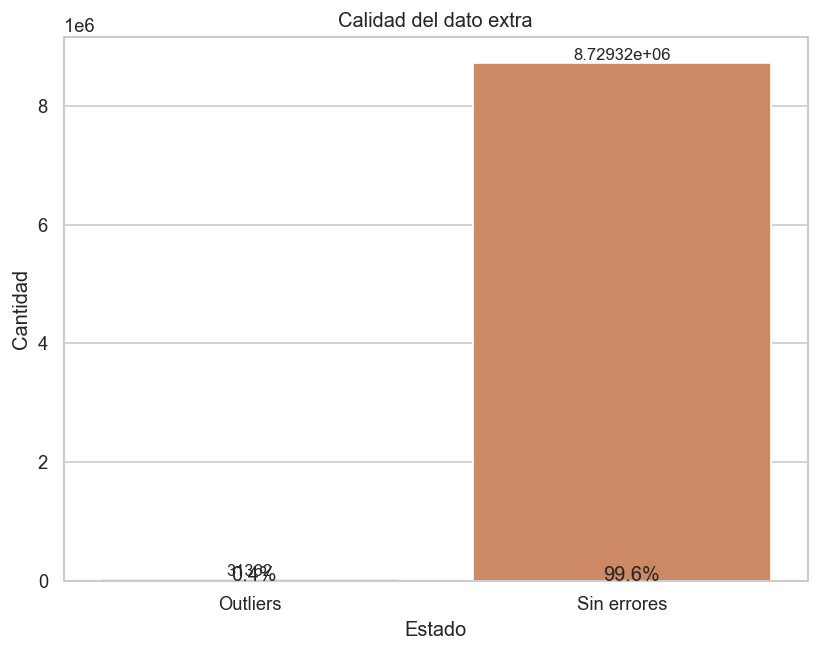

In [64]:
dic_calidad =  {'Outliers': df.extra[df.extra < min].count() + df.extra[df.extra > max].count(),
                'Sin errores': df.extra.count() - (df.extra[df.extra < min].count() + df.extra[df.extra > max].count())}
df_calidad = pd.DataFrame(list(dic_calidad.items()),columns = ['Estado', 'Cantidad'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_calidad['Estado'],y = 'Cantidad', data = df_calidad)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato extra')
plt.show()


k) Campo mta_tax

In [65]:
df.mta_tax.nunique()

15

In [66]:
df.mta_tax.describe()

count    8.760687e+06
mean     4.975066e-01
std      4.333281e-02
min     -5.000000e-01
25%      5.000000e-01
50%      5.000000e-01
75%      5.000000e-01
max      4.549000e+01
Name: mta_tax, dtype: float64

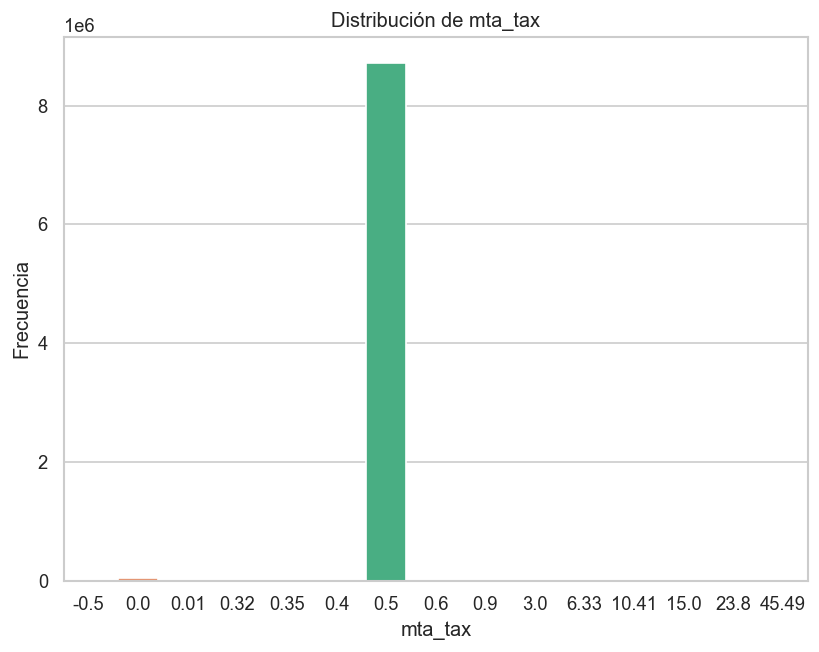

In [67]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'mta_tax',data=df)
plt.ylabel('Frecuencia')
plt.title('Distribución de mta_tax')
plt.show()

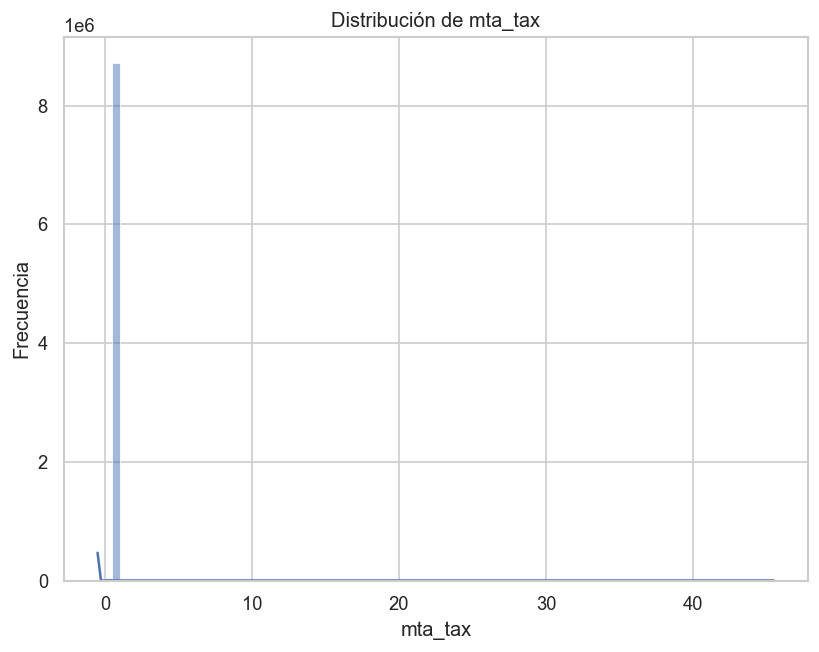

In [68]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'mta_tax',data=df,binwidth=0.5,kde=True)
plt.ylabel('Frecuencia')
plt.title('Distribución de mta_tax')
plt.show()

In [69]:
IQR = df.mta_tax.quantile(.75) - df.mta_tax.quantile(.25)
min = df.mta_tax.quantile(.25) - (1.5 * IQR)
max = df.mta_tax.quantile(.75) + (1.5 * IQR)

In [70]:
df.mta_tax[df.mta_tax < min].count()

40102

In [71]:
df.mta_tax[df.mta_tax > max].count()

80

In [72]:
df.mta_tax[(df.mta_tax >= min) & (df.mta_tax <= max)].nunique()

1

In [73]:
df.mta_tax[(df.mta_tax >= min) & (df.mta_tax <= max)].unique()

array([0.5])

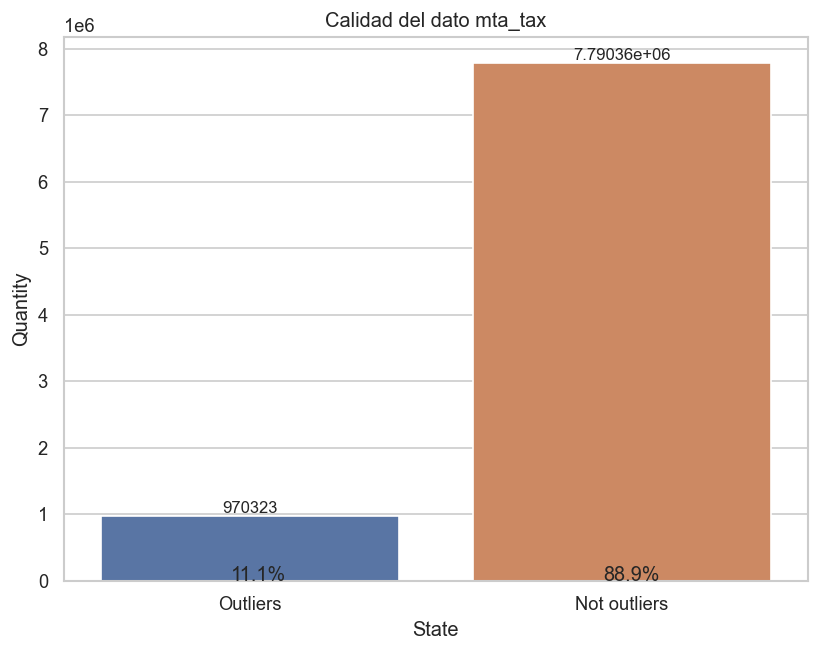

In [74]:
dic_quality =  {'Outliers': df.mta_tax[df.mta_tax < min].count() + df.mta_tax[df.mta_tax > max].count(),
                'Not outliers': df.mta_tax.count() - (df.mta_tax[df.mta_tax < min].count() + df.mta_tax[df.mta_tax > max].count())}
df_df_quality = pd.DataFrame(list(dic_quality.items()),columns = ['State', 'Quantity'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x =df_quality['State'],y = 'Quantity', data =df_quality)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('Calidad del dato mta_tax')
plt.show()

l) Campo tip_amount

In [75]:
df.tip_amount.describe()

count    8.760687e+06
mean     1.818759e+00
std      2.486375e+00
min     -8.880000e+01
25%      0.000000e+00
50%      1.360000e+00
75%      2.350000e+00
max      4.417100e+02
Name: tip_amount, dtype: float64

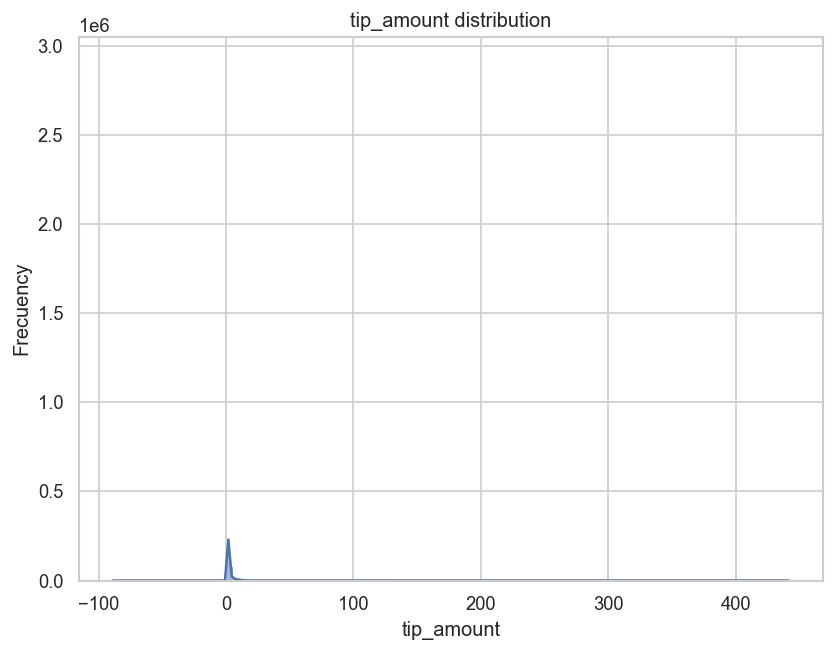

In [76]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'tip_amount',data=df,binwidth=0.1,kde=True)
plt.ylabel('Frecuency')
plt.title('tip_amount distribution')
plt.show()

In [77]:
IQR = df.tip_amount.quantile(.75) - df.tip_amount.quantile(.25)
min = df.tip_amount.quantile(.25) - (1.5 * IQR)
max = df.tip_amount.quantile(.75) + (1.5 * IQR)

In [78]:
df.tip_amount[df.tip_amount < min].count()

5

In [79]:
df.tip_amount[df.tip_amount > max].count()

465853

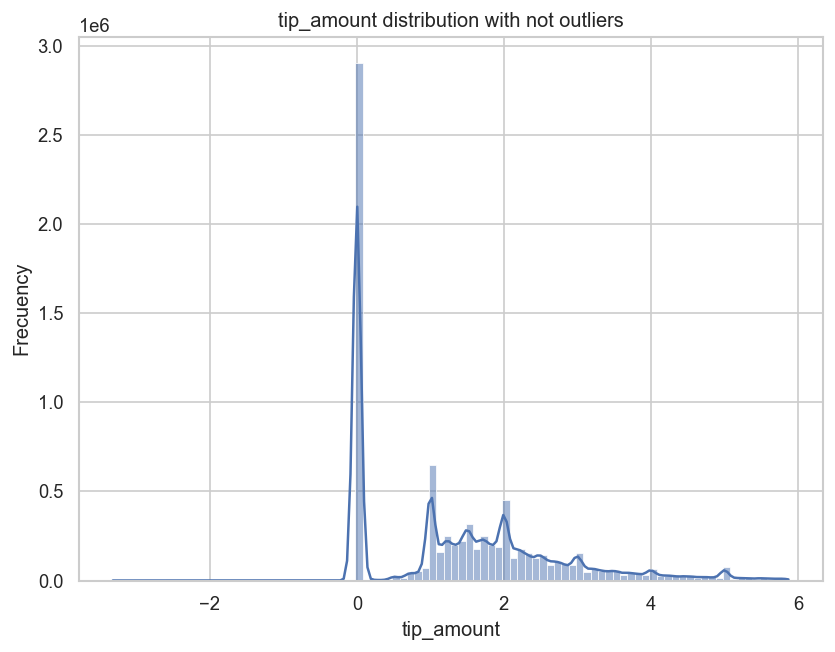

In [80]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'tip_amount', data=df[(df.tip_amount >= min) & (df.tip_amount <= max)], binwidth=0.1, kde=True)
plt.ylabel('Frecuency')
plt.title('tip_amount distribution with not outliers')
plt.show()

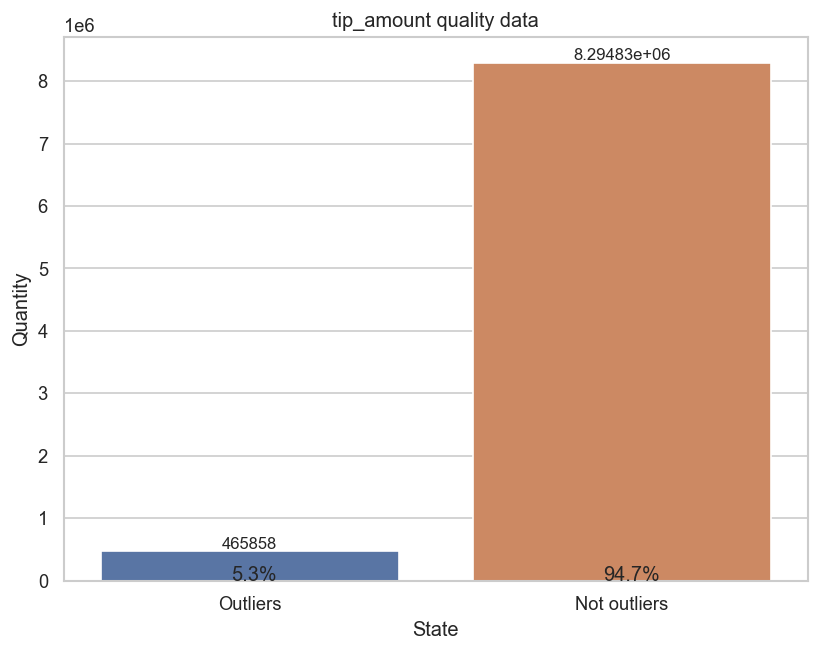

In [81]:
dic_quality =  {'Outliers': df.tip_amount[df.tip_amount < min].count() + df.tip_amount[df.tip_amount > max].count(),
                'Not outliers': df.tip_amount.count() - (df.tip_amount[df.tip_amount < min].count() + df.tip_amount[df.tip_amount > max].count())}
df_quality = pd.DataFrame(list(dic_quality.items()),columns = ['State', 'Quantity'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_quality['State'],y = 'Quantity', data = df_quality)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('tip_amount quality data')
plt.show()

m) tolls_amount

In [82]:
df.tolls_amount.describe()

count    8.760687e+06
mean     3.026157e-01
std      1.738184e+00
min     -1.500000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.507000e+02
Name: tolls_amount, dtype: float64

In [83]:
df.tolls_amount.nunique()

967

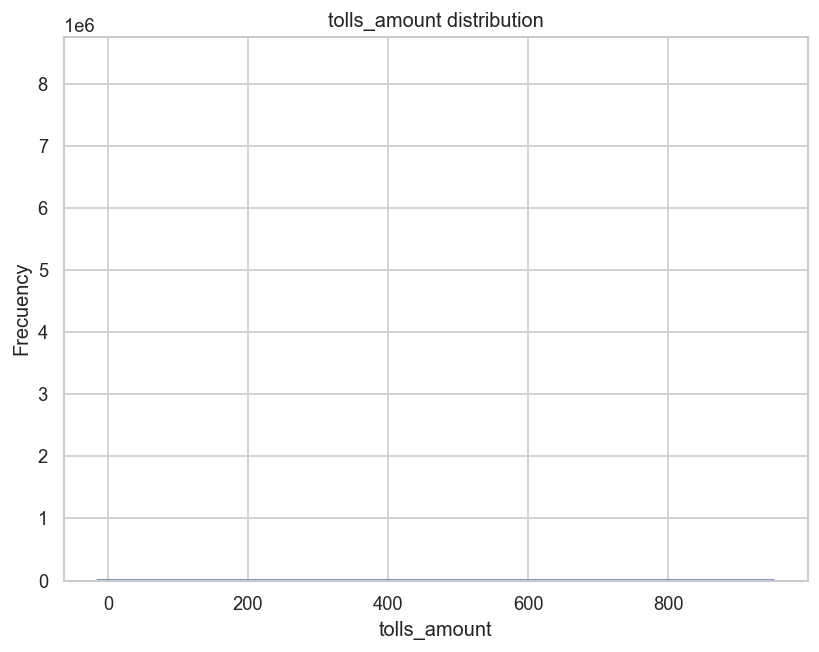

In [84]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'tolls_amount', data=df, binwidth=0.5, kde=True)
plt.ylabel('Frecuency')
plt.title('tolls_amount distribution')
plt.show()

In [85]:
df[df.tolls_amount != 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
42,1,2018-01-01 00:23:44,2018-01-01 00:52:12,1,7.30,1,N,90,82,1,26.5,0.5,0.5,1.00,5.76,0.3,34.56,NaN,NaN
104,1,2018-01-01 00:49:19,2018-01-01 01:11:58,2,9.10,1,N,138,238,1,28.0,0.5,0.5,7.00,5.76,0.3,42.06,NaN,NaN
147,2,2018-01-01 00:37:31,2018-01-01 01:24:24,1,22.07,5,N,132,265,1,113.0,0.0,0.0,24.76,10.50,0.3,148.56,NaN,NaN
150,1,2018-01-01 00:40:13,2018-01-01 01:31:28,2,16.40,1,N,186,205,2,54.0,0.5,0.5,0.00,5.76,0.3,61.06,NaN,NaN
173,1,2018-01-01 00:58:09,2018-01-01 01:35:58,2,24.00,1,N,132,220,1,65.5,0.5,0.5,18.10,5.76,0.3,90.66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760594,1,2018-01-31 23:30:37,2018-01-31 23:49:09,1,8.00,1,N,138,162,1,24.5,0.5,0.5,6.30,5.76,0.3,37.86,NaN,NaN
8760612,1,2018-01-31 23:24:36,2018-02-01 00:07:51,1,19.10,2,N,132,90,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,NaN,NaN
8760639,1,2018-01-31 23:13:17,2018-01-31 23:32:00,1,10.80,1,N,142,200,1,30.5,0.5,0.5,3.44,2.64,0.3,37.88,NaN,NaN
8760669,2,2018-01-31 23:25:02,2018-01-31 23:55:33,1,10.69,1,N,138,230,1,34.5,0.5,0.5,5.00,5.76,0.3,46.56,NaN,NaN


In [86]:
IQR = df.tolls_amount.quantile(.75) - df.tolls_amount.quantile(.25)
min = df.tolls_amount.quantile(.25) - (1.5 * IQR)
max = df.tolls_amount.quantile(.75) + (1.5 * IQR)

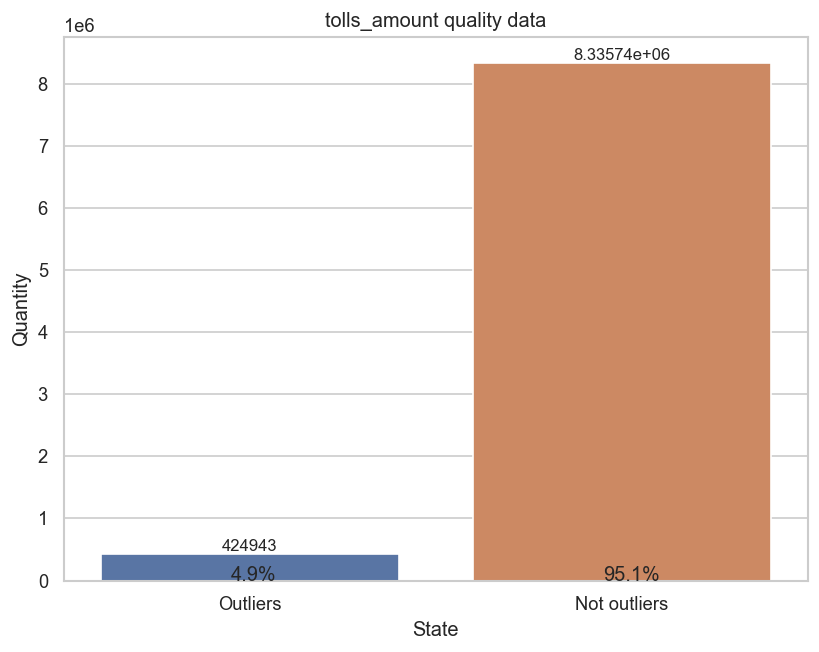

In [87]:
dic_quality =  {'Outliers': df.tolls_amount[df.tolls_amount < min].count() + df.tolls_amount[df.tolls_amount > max].count(),
                'Not outliers': df.tolls_amount.count() - (df.tolls_amount[df.tolls_amount < min].count() + df.tolls_amount[df.tolls_amount > max].count())}
df_quality = pd.DataFrame(list(dic_quality.items()),columns = ['State', 'Quantity'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_quality['State'],y = 'Quantity', data = df_quality)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('tolls_amount quality data')
plt.show()

n) improvement_surcharge

In [88]:
df.improvement_surcharge.unique()

array([ 0.3, -0.3,  0. ,  1. ])

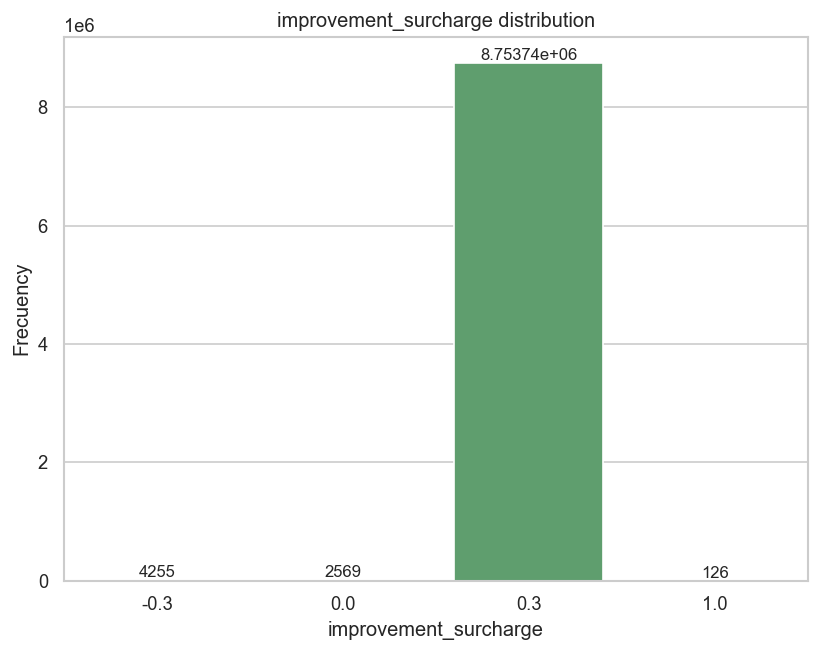

In [89]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'improvement_surcharge',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuency')
plt.title('improvement_surcharge distribution')
plt.show()

o) total_amount

In [90]:
df.total_amount.describe()

count    8.760687e+06
mean     1.549109e+01
std      1.419546e+01
min     -4.503000e+02
25%      8.300000e+00
50%      1.130000e+01
75%      1.662000e+01
max      8.016800e+03
Name: total_amount, dtype: float64

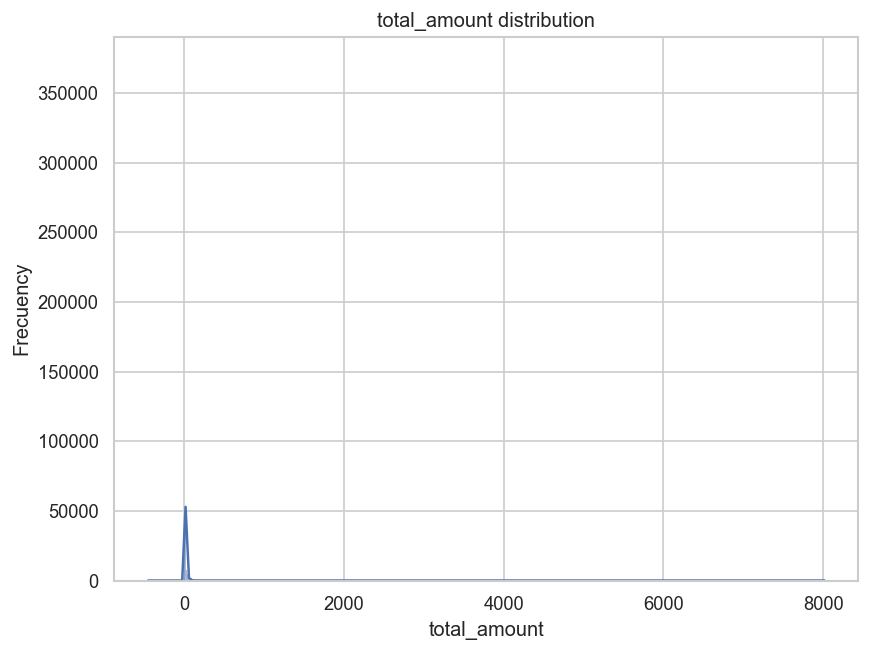

In [91]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'total_amount',data=df,binwidth=0.25,kde=True)
plt.ylabel('Frecuency')
plt.title('total_amount distribution')
plt.show()

In [92]:
IQR = df.total_amount.quantile(.75) - df.total_amount.quantile(.25)
min = df.total_amount.quantile(.25) - (1.5 * IQR)
max = df.total_amount.quantile(.75) + (1.5 * IQR)

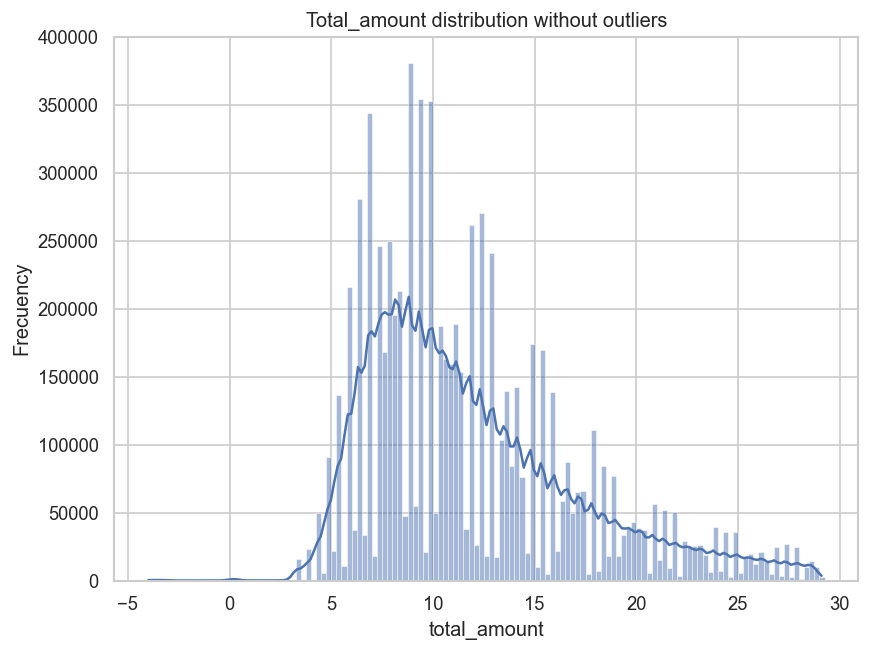

In [93]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'total_amount',data=df[(df.total_amount >= min) & (df.total_amount <= max)],binwidth=0.25,kde=True)
plt.ylabel('Frecuency')
plt.title('Total_amount distribution without outliers')
plt.show()

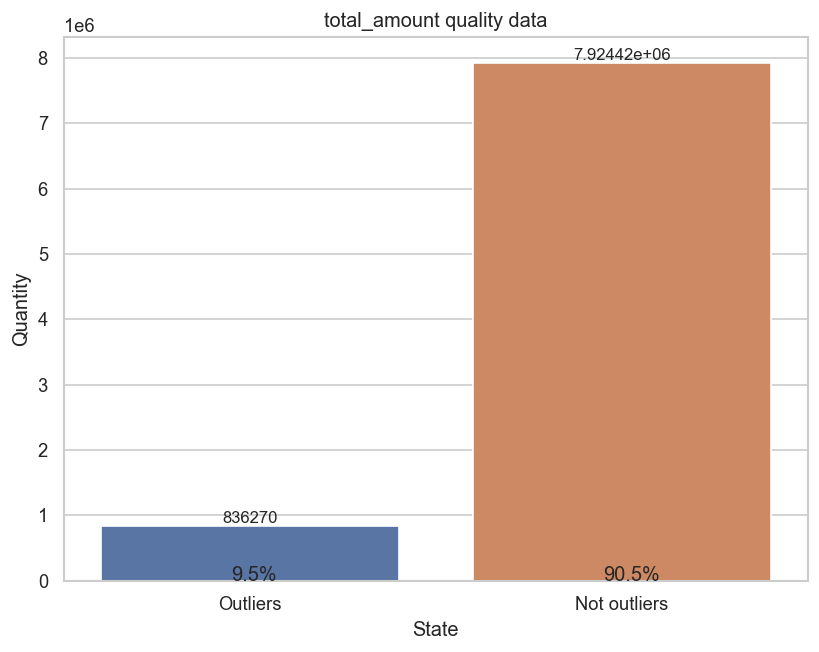

In [94]:
dic_quality =  {'Outliers': df.total_amount[df.total_amount < min].count() + df.total_amount[df.total_amount > max].count(),
                'Not outliers': df.total_amount.count() - (df.total_amount[df.total_amount < min].count() + df.total_amount[df.total_amount > max].count())}
df_quality = pd.DataFrame(list(dic_quality.items()),columns = ['State', 'Quantity'])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = df_quality['State'],y = 'Quantity', data = df_quality)
plt.bar_label(splot.containers[0])
without_hue (splot,df.trip_distance,0.05)
plt.title('total_amount quality data')
plt.show()

p) congestion_surcharge

In [95]:
df.congestion_surcharge.unique()

array([nan, 2.5])

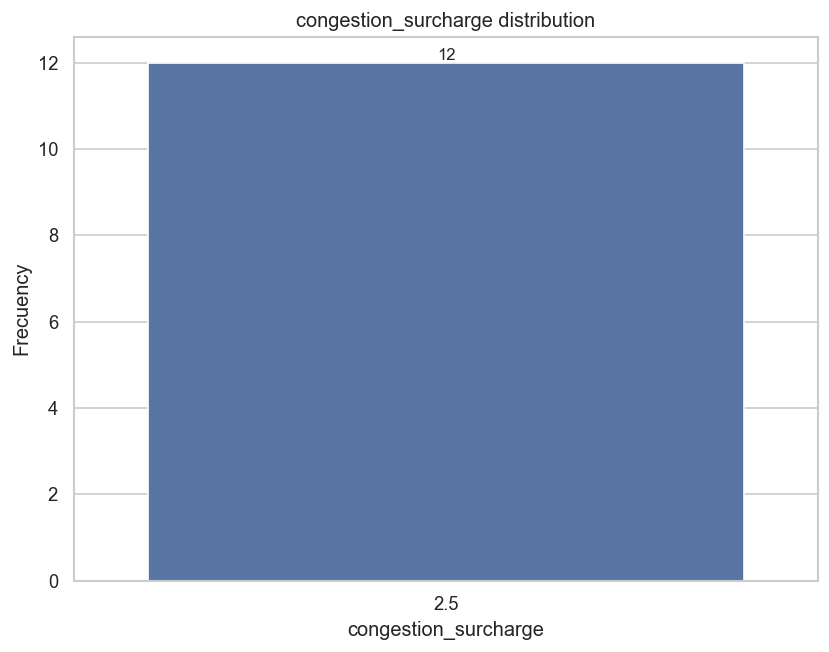

In [96]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'congestion_surcharge',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuency')
plt.title('congestion_surcharge distribution')
plt.show()

q) airport_fee

In [97]:
df.airport_fee.unique()

array([nan,  0.])

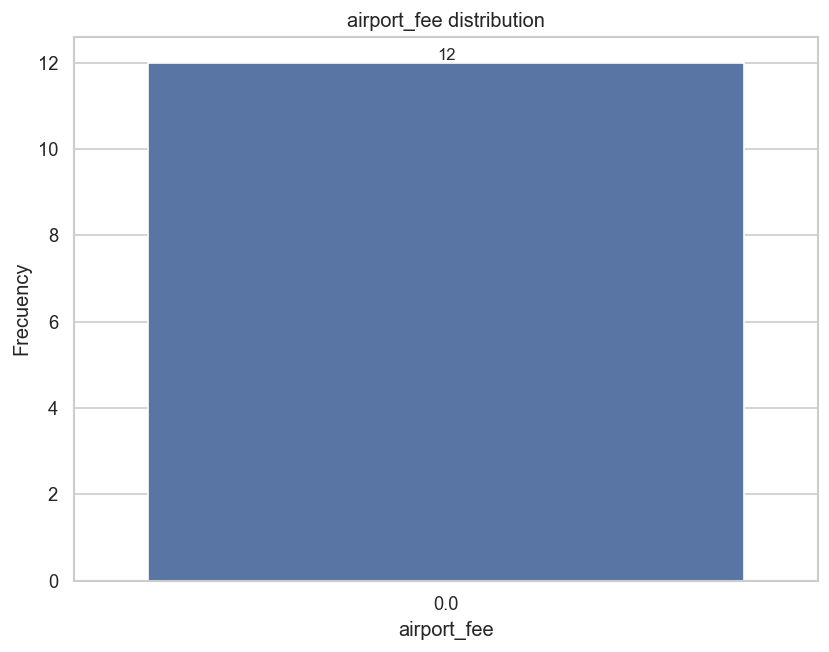

In [98]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.countplot(x = 'airport_fee',data=df)
plt.bar_label(splot.containers[0])
plt.ylabel('Frecuency')
plt.title('airport_fee distribution')
plt.show()

### Step 4: Final considerations

Relation between trip_distance and fare_amount

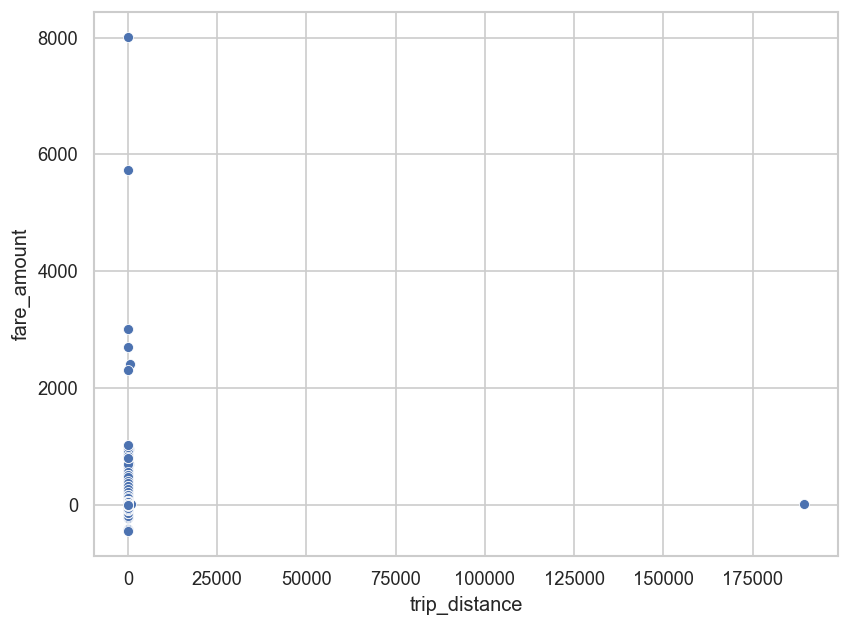

In [99]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.scatterplot(x = 'trip_distance',y = 'fare_amount', data=df)
plt.show()

Because of the presence of outliers, we cannot appreciate well the relation of theses two variables. Thus, we cut (only for an observation) the ranges of that variables for a better visualization.

- 0 miles < trip_distance < 100 miles
- 0 USD < fare_amount < 500 USD

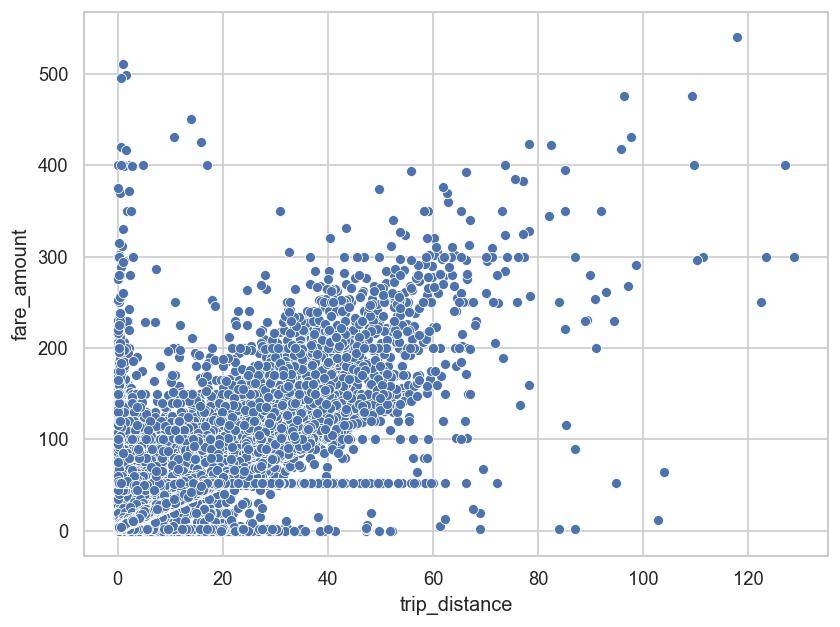

In [100]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.scatterplot(x = 'trip_distance',y = 'fare_amount', data=df[(df.trip_distance > 0) & (df.trip_distance < 130) & (df.fare_amount > 0) & (df.fare_amount < 550)])
plt.show()

We can appreciate that exist an increasing linear trend, but even though of that, there are unusual patterns. For example, high amounts with short distances, and low amounts with long distances.

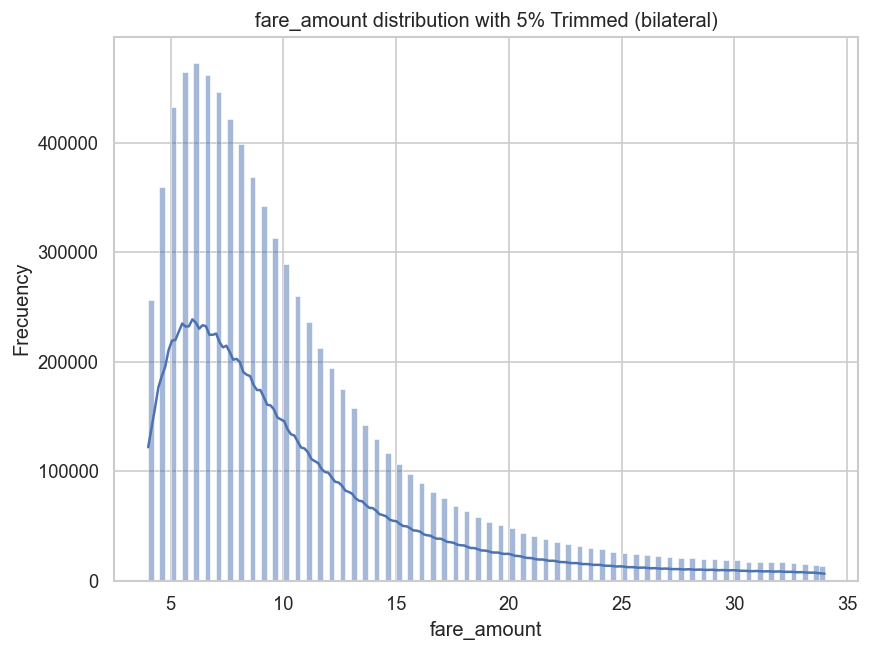

In [101]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_amount', data=df[(df.fare_amount >= df.fare_amount.quantile(.05)) & (df.fare_amount <= df.fare_amount.quantile(.95))], binwidth=0.25, kde=True)
plt.ylabel('Frecuency')
plt.title('fare_amount distribution with 5% Trimmed (bilateral)')
plt.show()